In [1]:
import numpy as np
import random
import scipy.interpolate as interp
import matplotlib.pyplot as plt
H_in_kJmol = 2625.499639
R = 8.314 # J/(K*mol)
T = 300   # K
RT = R*T/1000.0 # kJ / mol
RT_au = RT/2625.5
kB          = 1.380648e-23      # J / K
H_to_J      = 4.359744e-18      #
kB_a        = kB / H_to_J       # Hartree / K

In [2]:
def get_F(dat, x):
    dx = x[1]-x[0]
    prob_surface = np.exp(dat/RT_au)
    prob_surface /= prob_surface.sum()*dx
    F = RT*np.log(prob_surface, out=np.zeros_like(prob_surface), where=(prob_surface!=0))
    F -= F.min()
    return (prob_surface, F)

In [3]:
def RMSD(dat):
    d = np.loadtxt('ABF/500/bias_out_40000.dat', skiprows=1)
    (P,ref) = get_F(d[:,3],d[:,0])
    diff = np.power(ref-dat,2.0)
    mean_diff = np.mean(diff)
    return np.sqrt(mean_diff)

In [4]:
RMSD(np.loadtxt(f'ABF/100/bias_out_40000.dat', skiprows=1)[:,3])

14.192834069606706

In [5]:
RMSD_ABF_100 = []
for i in range(1000,41000,1000):
    dat = np.loadtxt(f'ABF/100/bias_out_%d.dat' % (i), skiprows=1)
    (P,dat) = get_F(dat[:,3], dat[:,0])
    RMSD_ABF_100.append(RMSD(dat))

In [6]:
RMSD_ABF_1 = []
for i in range(1000,41000,1000):
    dat = np.loadtxt(f'ABF/1/bias_out_%d.dat' % (i), skiprows=1)
    (P,dat) = get_F(dat[:,3], dat[:,0])
    RMSD_ABF_1.append(RMSD(dat))

In [7]:
RMSD_ABF_10 = []
for i in range(1000,25000,1000):
    dat = np.loadtxt(f'ABF/10/bias_out_%d.dat' % (i), skiprows=1)
    (P,dat) = get_F(dat[:,3], dat[:,0])
    RMSD_ABF_10.append(RMSD(dat))

In [8]:
RMSD_ABF_500 = []
for i in range(1000,41000,1000):
    dat = np.loadtxt(f'ABF/500/bias_out_%d.dat' % (i), skiprows=1)
    (P,dat) = get_F(dat[:,3], dat[:,0])
    RMSD_ABF_500.append(RMSD(dat))

Text(0, 0.5, 'RMSD')

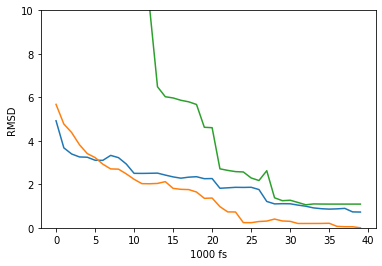

In [9]:
plt.plot(RMSD_ABF_100)
plt.plot(RMSD_ABF_500)
#plt.plot(RMSD_ABF_10)
plt.plot(RMSD_ABF_1)
plt.ylim(0,10)
plt.xlabel('1000 fs')
plt.ylabel('RMSD')

In [10]:
eABF = np.loadtxt('eABF/bias_out.dat', skiprows=1)
x = np.degrees(eABF[:,0])
(eABF_P,eABF_F) = get_F(eABF[:,3], x)

In [11]:
meABF = np.loadtxt('meta_eABF/bias_out.dat', skiprows=1)
(meABF_P,meABF_F) = get_F(meABF[:,3], x)

In [12]:
ABF = np.loadtxt('ABF/bias_out_10000.dat', skiprows=1)
x1 = np.degrees(ABF[:,0])
(ABF_P, ABF_F) = get_F(ABF[:,3], x1)

In [1]:
plt.rcParams["figure.figsize"] = [12,5]
fig, axs = plt.subplots(ncols=2)
axs[0].plot(x1, ABF_P, label='ABF')
axs[1].plot(x1, ABF_F-ABF_F.min(), label='ABF')
axs[0].plot(x, eABF_P, label='eABF')
axs[1].plot(x, eABF_F-eABF_F.min(), label='eABF')
axs[0].plot(x, meABF_P, label='meta-eABF')
axs[1].plot(x, meABF_F-meABF_F.min(),label='meta-eABF')
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel('torsion [degree]')
axs[1].set_xlabel('torsion [degree]')
axs[0].set_ylabel('P')
axs[1].set_ylabel('free Energy [kJ/mol]')
axs[0].set_title('probability surface (sum(P(x)dx)=1)')
axs[1].set_title('free Energy')
plt.tight_layout()
plt.legend()
plt.savefig("torsion.png", dpi=400)
plt.show()
plt.close()

NameError: name 'plt' is not defined